In [41]:
# %load search_exoplanet.py
# Search an exoplanet in the TOI list

import lightkurve as lk

target = 'tic 149833117'
result = lk.search_targetpixelfile(target, mission='TESS')
result

#,observation,target_name,productFilename,distance
0,TESS Sector 20,149833117,tess2019357164649-s0020-0000000149833117-0165-s_tp.fits,0.0


In [42]:
tpf = result.download()

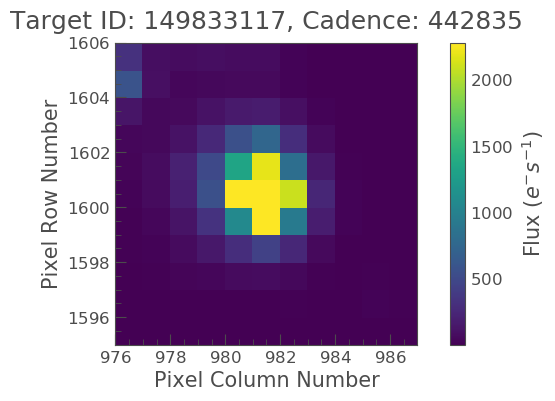

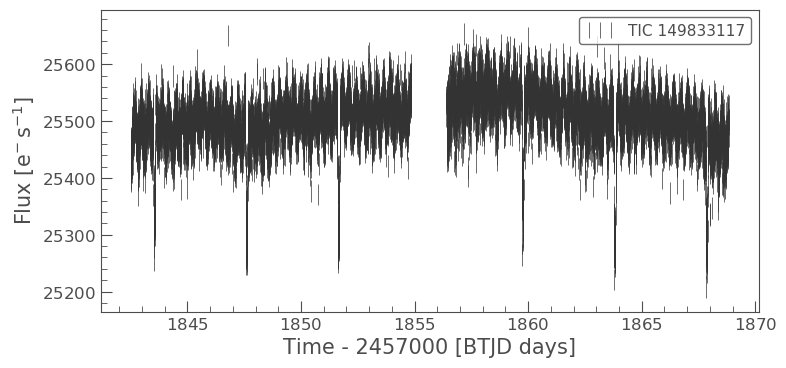

In [43]:
tpf.plot()

lc = tpf.to_lightcurve()
lc.errorbar()

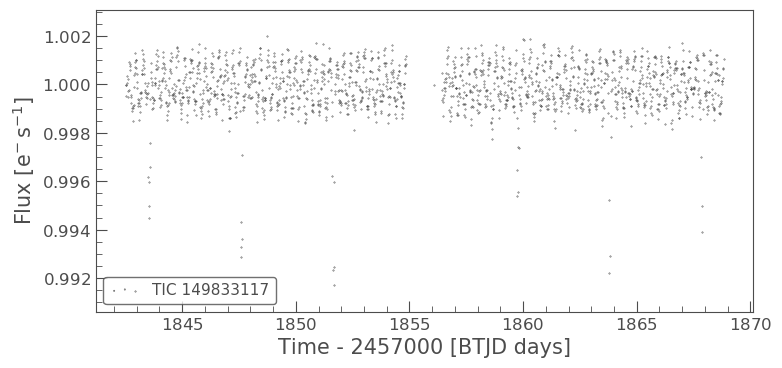

In [45]:
shape = int(round(lc.time.shape[0] * 0.05))
window = shape + 1 if shape % 2 == 0 else shape # window_length should be odd

# .fold(period=4.052, t0=1700).
scatter_lc = lc.remove_outliers().flatten(window_length=window).bin(binsize=10).scatter(s=0.1)

In [46]:
flat, trend = lc.remove_outliers().flatten(window_length=window, return_trend=True)

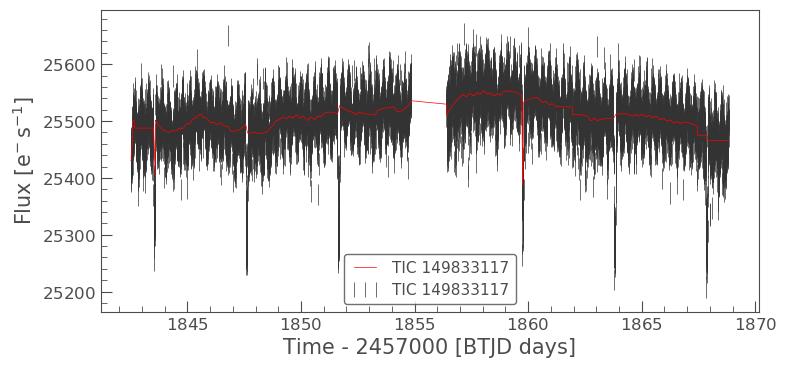

In [53]:
ax = lc.errorbar()
trend.plot(ax=ax, color='red')

In [57]:
tpf.interact()